In [220]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [221]:
df=pd.read_csv('Data/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [222]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [223]:
df.shape

(205, 26)

In [224]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [225]:
def get_numerical_columns(df, exclude_columns=['price']):
    """
    Returns a list of numerical column names from the DataFrame,
    excluding specified columns (e.g., target variable).
    """
    return [col for col in df.columns if df[col].dtype != 'object' and col not in exclude_columns]

# Usage
numerical_cols = get_numerical_columns(df)
print(numerical_cols)


['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [226]:
def get_categorical_columns(df):
    """
    Returns a list of categorical column names from the DataFrame.
    """
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

categorical_cols = get_categorical_columns(df)
print(categorical_cols)


['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


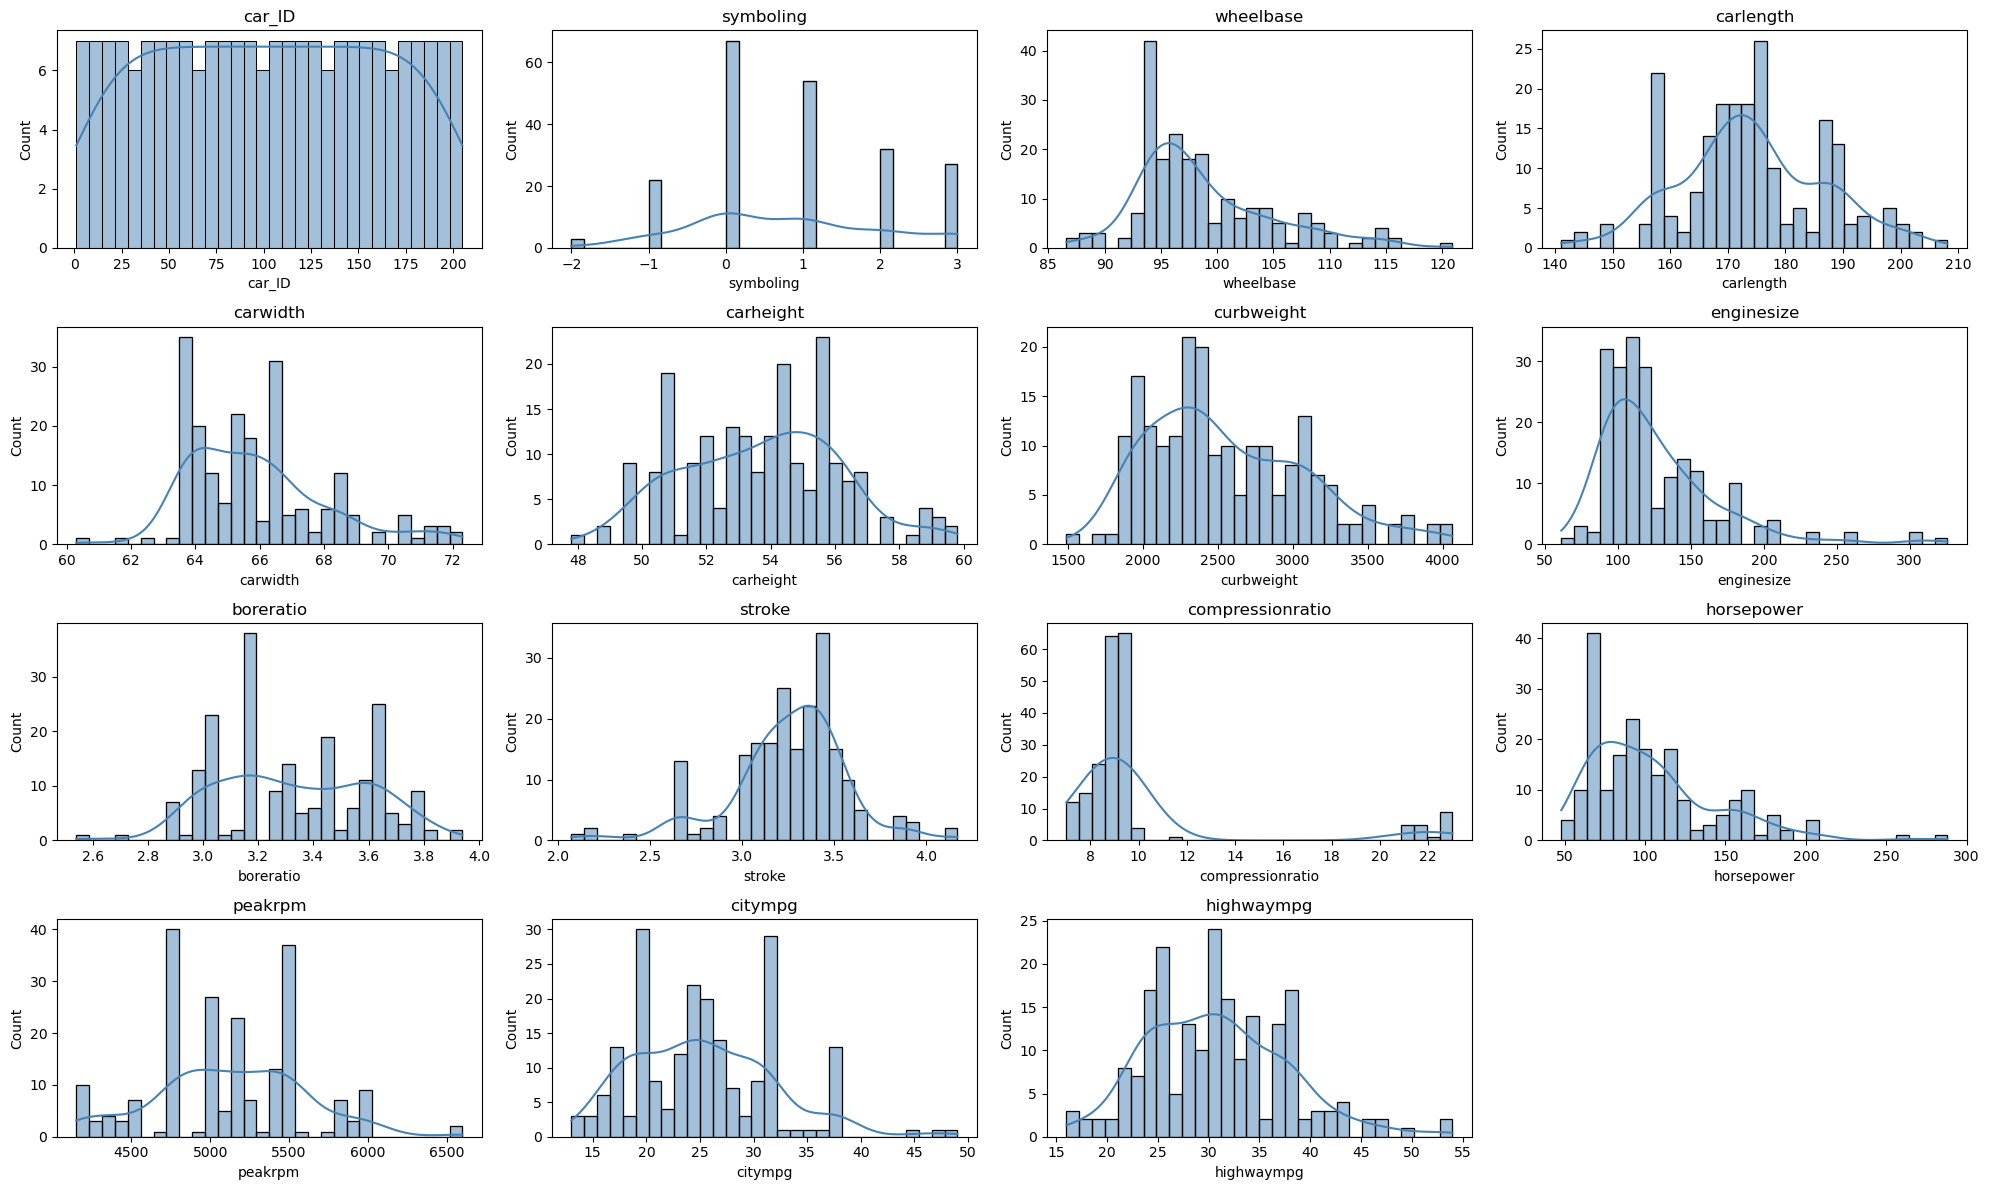

In [227]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)  
    sn.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [228]:
df['Car_Area']=df['carheight']*df['carwidth']

df['Car_Volume']=df['carheight']*df['carwidth']*df['carlength']


print(df[['Car_Area','Car_Volume']].head())

   Car_Area  Car_Volume
0   3128.08  528019.904
1   3128.08  528019.904
2   3432.20  587592.640
3   3594.66  634816.956
4   3605.52  636734.832


In [229]:
df[categorical_cols].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [230]:
carModel=df['CarName'].value_counts().head(15)


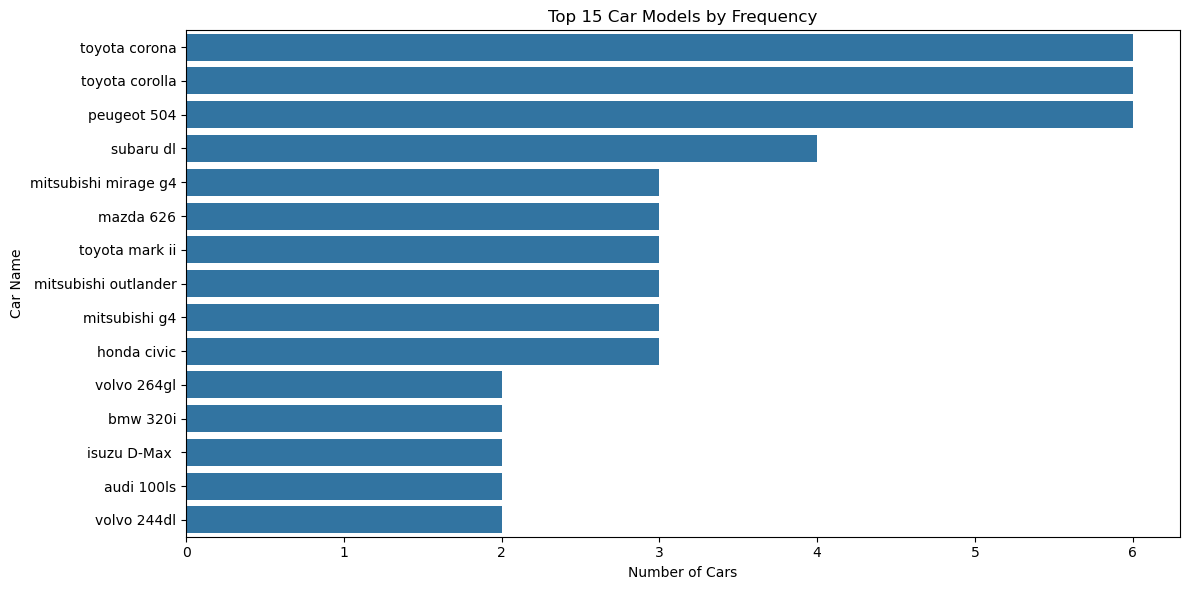

In [231]:
plt.figure(figsize=(12,6))
sn.barplot(x=carModel.values, y=carModel.index)
plt.title('Top 15 Car Models by Frequency')
plt.xlabel('Number of Cars')
plt.ylabel('Car Name')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer

numerical_cols = list(get_numerical_columns(df))


column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
    ],
    remainder='drop'
)

y = df['price']

X_num_scaled = column_transformer.fit_transform(df[numerical_cols])


In [233]:

ddt=pd.DataFrame(X_num_scaled, columns=numerical_cols)

ddt.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Car_Area,Car_Volume
0,-1.723622,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-1.853850,-1.144195
1,-1.706724,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-1.853850,-1.144195
2,-1.689826,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,-0.492903,-0.392670
3,-1.672928,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.234110,0.203076
4,-1.656029,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.282709,0.227271


In [234]:
encoder=LabelEncoder()
categorical_cols=list(get_categorical_columns(df))
for col in categorical_cols:
    df[col]=encoder.fit_transform(df[col])

X_cat=df[categorical_cols].values
X_transformed=np.hstack((X_num_scaled,X_cat))


In [235]:
y = np.log1p(df['price']) 

In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  root_mean_squared_error,r2_score

## Create Car Prediction Project using Linear Regression with a R2 SCORE 0.86

In [237]:
def makeLinearRegression(X_transformed, y, log_transformed=False):
    lr = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    if log_transformed:
        y_test_actual = np.expm1(y_test)
        y_pred_actual = np.expm1(y_pred)

        rmse = root_mean_squared_error(y_test_actual, y_pred_actual)
        r2 = r2_score(y_test_actual, y_pred_actual)

        print("Root Mean Square Error (on original scale):", rmse)
        print("R² Score (on original scale):", r2)
    else:
        rmse = root_mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print("Root Mean Square Error:", rmse)
        print("R² Score:", r2)

makeLinearRegression(X_transformed,y,log_transformed=True)


Root Mean Square Error (on original scale): 3319.7988780889395
R² Score (on original scale): 0.8603939289112079
